In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import hvplot.pandas

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [3]:
#mro_data = pd.DataFrame(raw[symbol2])
#mro_data.dropna(inplace=True)



import os

import requests

import json


from dotenv import load_dotenv

import alpaca_trade_api as tradeapi


import datetime

%matplotlib inline


# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()

np.set_printoptions(precision=5, suppress=True,
                   formatter={'float': lambda x: f'{x:6.3f}'})

Python-dotenv could not parse statement starting at line 1


In [4]:
spfive_closefull = pd.read_csv('sp500_closefull.csv',infer_datetime_format=True, parse_dates=True, index_col='Date')

ratios_df = pd.read_csv('ratios_vals_money.csv',infer_datetime_format=True, parse_dates=True, index_col=['Ticker', 'Year'])


In [5]:
close_prices = pd.read_csv(
    Path('us-shareprices-daily.csv'),
    index_col=['Ticker','Date'],
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=';'
) 
wtf = close_prices.groupby(['Ticker','Date']).mean()

pretty_young_yhang = wtf.dropna(axis=0)

len_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=1) > "2010-02-14"]) 


In [6]:
A_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "A"]) 
ABC_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "ABC"]) 
ABM_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "ABM"]) 
XLNX_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "XLNX"]) 
YUM_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "YUM"]) 
ZION_data = (pretty_young_yhang[pretty_young_yhang.index.get_level_values(level=0) == "ZION"]) 


In [7]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE

In [8]:
close_price_df =  YUM_data[['Close']]

close_price_df['pct_change'] = close_price_df.pct_change()

In [9]:
close_price_df_cut = close_price_df

In [10]:
close_price_df_cut['Returns'] = np.log(close_price_df_cut['Close'] / close_price_df_cut['Close'].shift(1))

In [11]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE


close_price_df_cut["cumulative_product"] = (1 + close_price_df_cut['Returns']).cumprod() 


#close_price_df_cut["cumusum_returns"].plot(figsize=(16,8), title='Cumulative Returs Whale Funds With S&P 500')
#close_price_df_cut["cumulative_product"].plot(figsize=(16,8),subplots=True, title="DCumulative Returs")


In [12]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

close_price_df_cut["cumulative_sum"] = close_price_df_cut["cumulative_product"].cumsum()

#close_price_df_cut["cumulative_sum"].plot(figsize=(16,8), title='Cumulative Returns S&P 500 Over Time ?????S')

In [13]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

#close_price_df_cut.plot(kind='box', figsize=(20,17), title="Box Plot To Visualize the Volatility")



In [14]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
#close_price_df_cut_std.rename(columns={'pct_change' : "std"})
# YOUR CODE HERE

data_std = close_price_df_cut.std(axis=1)

close_price_df_cut['std'] = data_std


In [15]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

close_price_df_cut['anu_std_return_data'] =  close_price_df_cut.std(axis=1) * np.sqrt(252)




In [16]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE

trading_days = 252
close_price_df_cut['yearly_returns'] = close_price_df_cut['pct_change'] * trading_days
#close_price_df_cut_std['daily_rets'] = close_price_df_cut_std['yearly_returns'] / 252

In [17]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE

close_price_df_cut['portfolio_sharpe_ratio_annual'] = (close_price_df_cut['pct_change'].mean() * 252) / (data_std * np.sqrt(252))

In [18]:
##### Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

clean_data = close_price_df_cut

#clean_data.plot(kind='bar', figsize=(20, 10), title="Sharpe Ratios For The Funds & S&P500")

<AxesSubplot:xlabel='Ticker,Date'>

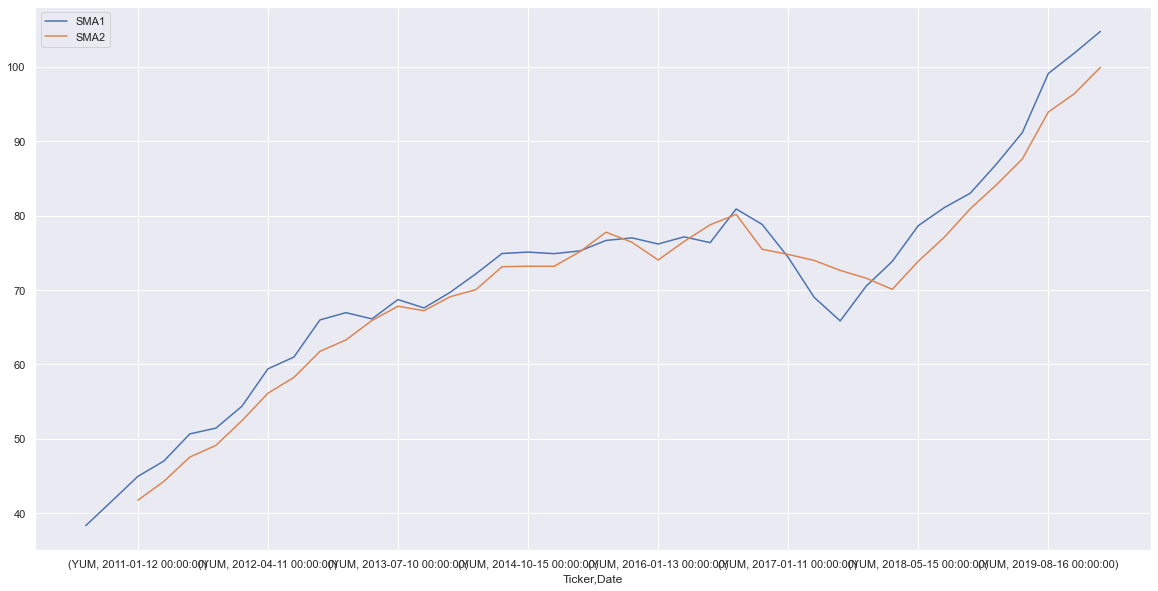

In [19]:
"""
# Trading Strategy

Simple Moving Average.
"""
len(clean_data)

SMA1 = 4 # Shorter SMA
SMA2 = 6 # Longer SMA

clean_data['SMA1'] = clean_data['Close'].rolling(SMA1).mean() # Shorter SMA
clean_data['SMA2'] = clean_data['Close'].rolling(SMA2).mean() # Longer SMA

clean_data[['SMA1','SMA2']].round(2).plot(figsize=(20, 10))



mro_data['SMA1'] = mro_data['MRO'].rolling(SMA1).mean() # Shorter SMA
mro_data['SMA2'] = mro_data['MRO'].rolling(SMA2).mean() # Longer SMA
mro_data.dropna(inplace=True)

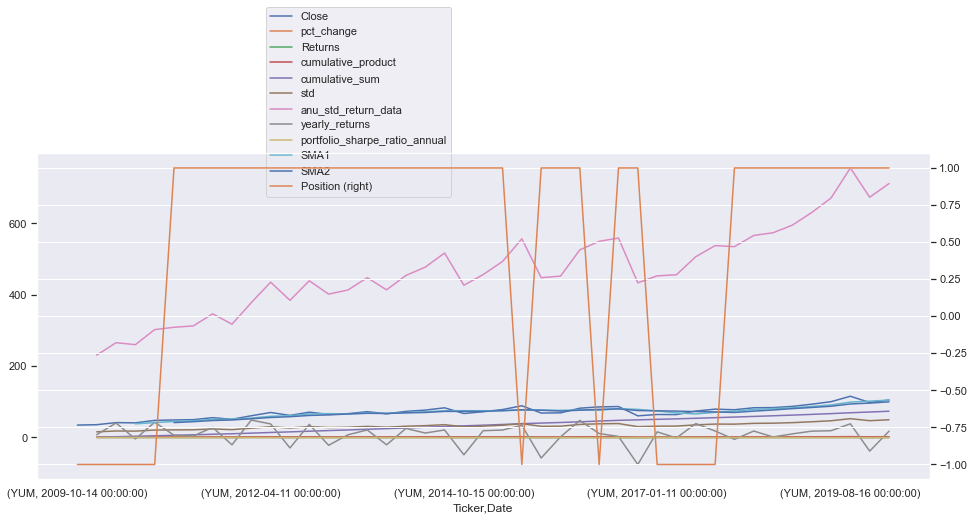

In [20]:
"""
Go long(=+1)when the shorter SMA is above the longer SMA

Go short(=+1)when the shorter SMA is below the longer SMA
"""
clean_data['Position'] = np.where(clean_data['SMA1'] > clean_data['SMA2'], 1, -1)

ax = clean_data.plot(secondary_y='Position', figsize=(16,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))


In [21]:
"""
Vectorized Backtesting:

Vectorized backtesting is implemented as follows. First, the log returns are caculated.
Then the positionings, represented as +1 or -1, are multiplied by the relavant log return.
This simple calculation is possible since a long position earns the return of the stock and short the negative.
Finally the log returns for the stock and the algo trading strategy based on SMAs need to be added up
and the exponential function applied to arrive at the performance values.
"""
#clean_data['Returns'] = np.log(mro_data['MRO'] / mro_data['MRO'].shift(1))

clean_data['Strategy'] = clean_data['Position'].shift(1) * clean_data['Returns']

clean_data.dropna(inplace=True)

#mro_data = mro_data[mro_data.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]  # .astype(np.float64) ?

#mro_data['AnSTD'] = mro_data['MRO'].std() * np.sqrt(252)

np.exp(clean_data[['Returns','Strategy']].sum())


Returns     2.18995
Strategy    2.35368
dtype: float64

In [22]:
from itertools import product 
sma1 = range(20, 61, 4)
sma2 = range(100, 281, 10)

results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(trow_returns['TROW'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(trow_returns['TROW'] / trow_returns['TROW'].shift(1))
    data['SMA1'] = trow_returns['TROW'].rolling(SMA1).mean() # Shorter SMA
    data['SMA2'] = trow_returns['TROW'].rolling(SMA2).mean() # Longer SMA
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
    'MARKET': perf['Returns'],
    'STRATEDY': perf['Strategy'],
    'OUT': perf['Strategy'] - perf['Returns']},
    index=[0]), ignore_index=True)



    

In [23]:
"""
Linear OLS Regression 
This section applies linear OLS regression to predict the direction of the market movements based on historical log returns.
To keep things simple, only two features are used. The first feature (lag_1) represents the log returns of the financial time series lagged by one day.
Second feature lags the log returns by two days. Log returns in contrast to prices - are stationary in general,
which often is a necessary condition for the application of statistical and ML algo.
"""

#raw = ratios_df
#symbol2 = 'QCOM'

'\nLinear OLS Regression \nThis section applies linear OLS regression to predict the direction of the market movements based on historical log returns.\nTo keep things simple, only two features are used. The first feature (lag_1) represents the log returns of the financial time series lagged by one day.\nSecond feature lags the log returns by two days. Log returns in contrast to prices - are stationary in general,\nwhich often is a necessary condition for the application of statistical and ML algo.\n'

In [24]:
#QCOM_data = pd.DataFrame(raw[symbol2])

#QCOM_data['Returns'] = np.log(QCOM_data / QCOM_data.shift(1))

#QCOM_data.dropna(inplace=True)

In [25]:
clean_data['direction'] = np.sign(clean_data['Returns']).astype(int)

<AxesSubplot:>

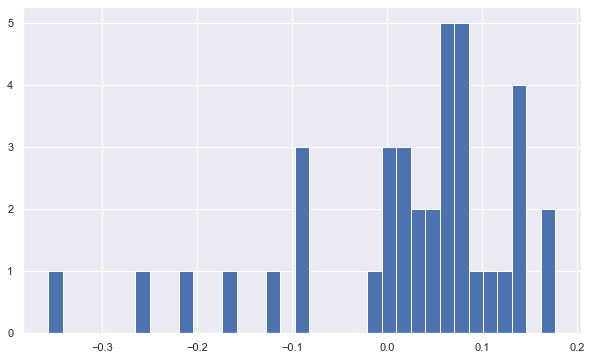

In [26]:
clean_data['Returns'].hist(bins=35,figsize=(10, 6))

In [27]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['Returns'].shift(lag)
        cols.append(col)
        
        
create_lags(clean_data)

In [28]:
clean_data.dropna(inplace=True)

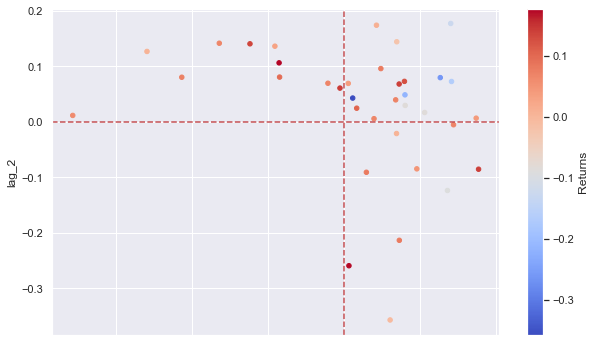

In [29]:
clean_data.plot.scatter(x='lag_1', y='lag_2', c='Returns', cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

In [30]:

"""
# Regression

linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movements based on the features,
and to backtest a trading strategy based on the predictions. Two approaches are avaliable:
using the log returns or only the direction data as the dependent variable during the regression. 
Predicitons are transformed to either +1, -1 to only work with the direction of the prediction:
"""

reg_data = clean_data


from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [31]:
reg_data['pos_ols_1'] = model.fit(reg_data[cols],
                                 reg_data['Returns']).predict(reg_data[cols]) # the regression is implemented on the log returns directly

In [32]:
reg_data['pos_ols_2'] = model.fit(reg_data[cols],
                                 reg_data['direction']).predict(reg_data[cols]) # on the direction data which is of primary interest

In [33]:
reg_data[['pos_ols_1','pos_ols_2']] = np.where(reg_data[['pos_ols_1','pos_ols_2']] > 0, 1, -1) # The real_valued predicitions are transformed to directional values

In [34]:
reg_data[['pos_ols_1']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_1
 1           22
-1           14
dtype: int64

In [35]:
reg_data[['pos_ols_2']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_2
 1           35
-1            1
dtype: int64

In [36]:
(reg_data['pos_ols_1'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

17

In [37]:
(reg_data['pos_ols_2'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

3

In [38]:
"""
With directional predictions, vectorized backtesting can be applied to jude the performance of the resulting trading strategies. 
At this stage, we have a few assumptions, 'zero transaction costs' and the usage of the same data set for both training and testing. 
"""

reg_data['strat_ols_1'] = reg_data['pos_ols_1'] * reg_data['Returns']

reg_data['strat_ols_2'] = reg_data['pos_ols_2'] * reg_data['Returns']

In [39]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

Returns        2.101441
strat_ols_1    4.140836
strat_ols_2    1.929147
dtype: float64

In [40]:
(reg_data['direction'] == reg_data['pos_ols_1']).value_counts() 

True     26
False    10
dtype: int64

In [41]:
(reg_data['direction'] == reg_data['pos_ols_2']).value_counts() 

True     25
False    11
dtype: int64

<AxesSubplot:xlabel='Ticker,Date'>

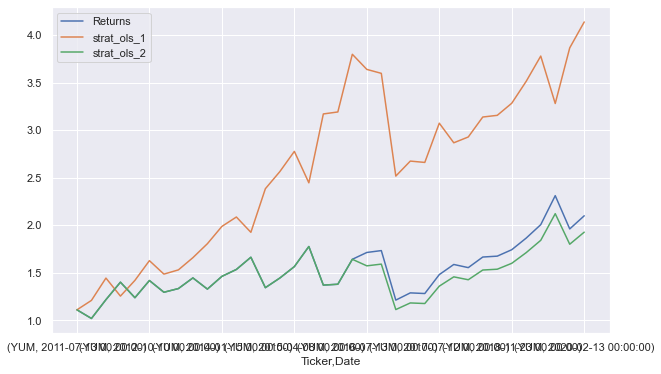

In [42]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [43]:
"""
# Clustering 
Here we apply k-means clustering to financial time series data to automatically come up with clusters that are used to formulate a trading strategy.
The algo identefies two clusters of feature values that predict either an upward or downward movement.

The following code applies the kmeans algo to the twwo features as used before.
ploting the two clusters
"""
from sklearn.cluster import KMeans

mod = KMeans(n_clusters=2, random_state=0)


In [44]:
mod.fit(reg_data[cols])

KMeans(n_clusters=2, random_state=0)

In [45]:
reg_data['pos_clust'] = mod.predict(reg_data[cols])

In [46]:
reg_data['pos_clust'] = np.where(reg_data['pos_clust'] == 1, -1, 1)

In [47]:
reg_data['pos_clust'].values


array([ 1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1])

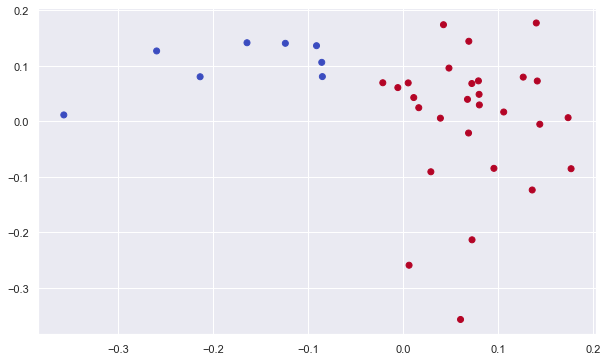

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(reg_data[cols].iloc[:, 0], reg_data[cols].iloc[:, 1],
           c=reg_data['pos_clust'], cmap='coolwarm')

In [49]:
"""
Frequency Approach 
Beyond more sophisticated algo and techniques , one might come up with the idea of using a frequancy approach to predict
directional movements in fin markets. On might transformm two realworld features into binary ones
and asses the probability of an upward and downward movement, respectively, from the historical observation os such movements given
the four possible combinations for the two binary features.
"""

def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [50]:
#close_prices_lineup = close_prices[['CSCO','UAL','TROW','ISRG' ,'PRGO','TPR' ,'DVN', 'MRO']]

In [51]:
"""
# Classification 
THis section applies the classification algo from ml to predicting the
direction of price movements in financial markets.
The application of the Logistic Regression, Gaussina Naive Bayes, and Support Vector Machines. 
"""

from sklearn import linear_model 

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC 

C = 1 

models = {
    'log_reg' : linear_model.LogisticRegression(C=C),
    'gauss_nb' : GaussianNB(),
    'svm' : SVC(C=C)
}

In [52]:
def fit_models(data):
    mfit = {model : models[model].fit(data[cols_bin],
                                     data['direction'])
           for model in models.keys()}
    
#fit_models(data)

In [53]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])
        
#fit_models(data)

In [54]:
# Second, the vectorized backtesting of the resulting trading strategies

def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['Returns']
        sel.append(col)
    sel.insert(0, 'Returns')
    
#evaluate_strats(data)
#sel.insert(1, 'strat_freq')
#data[sel].sum().apply(np.exp)
#data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [55]:
"""
# Five Binary Features 

An attempt to improve the strategies' performance,
the following code works eith five binary lags instead of two. 
"""


"\n# Five Binary Features \n\nAn attempt to improve the strategies' performance,\nthe following code works eith five binary lags instead of two. \n"

In [56]:
#reg_data = pd.DataFrame(raw[symbol2])

#mro_data['Returns'] = np.log(mro_data / mro_data.shift(1))

#mro_data.dropna(inplace=True)

#mro_data['direction'] = np.sign(mro_data['Returns']).astype(int)

In [80]:
lags = 5
create_lags(ZION_data)
ZION_data.dropna(inplace=True)


In [81]:
create_bins(ZION_data)
cols_bin


['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [59]:
#MROdata = mro_data[['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']]

In [82]:
ZION_data.dropna(inplace=True)


In [83]:
ZION_data['pos_freq'] = np.where(ZION_data[cols_bin].sum(axis=1) == 2, -1, 1)

In [84]:
(ZION_data['direction'] == ZION_data['pos_freq']).value_counts() 

KeyError: 'direction'

In [63]:
reg_data['strat_freq'] =  reg_data['pos_freq'] * reg_data['Returns']

In [64]:
reg_data[['Returns', 'strat_freq']].sum().apply(np.exp)

Returns       1.6954
strat_freq    1.6954
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

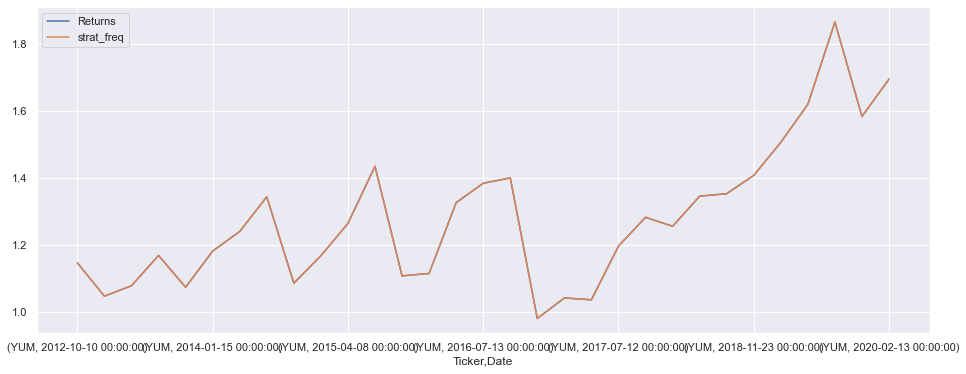

In [65]:
reg_data[['Returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(16,6))

In [66]:
fit_models(reg_data)


In [67]:
derive_positions(reg_data)

In [68]:
evaluate_strats(reg_data)

sel.insert(1, 'strat_freq')

In [70]:
reg_data[sel].sum().apply(np.exp)

Returns           1.695400
strat_freq        1.695400
strat_log_reg     1.695400
strat_gauss_nb    2.312478
strat_svm         2.095232
dtype: float64

In [71]:

#sel.insert(1, 'strat_freq')
#data[sel].sum().apply(np.exp)
#data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

<AxesSubplot:xlabel='Ticker,Date'>

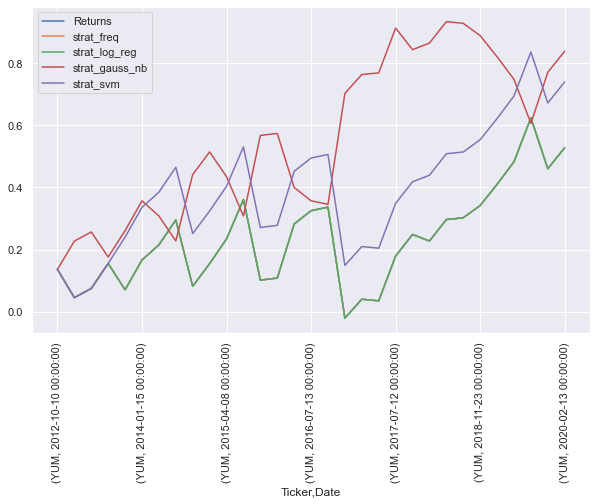

In [72]:
reg_data[sel].cumsum().plot(figsize=(10,6), rot=90)

In [73]:
"""
# Five DIgitized Features 
The following code uses the first and second moment of the historical log returns
to digitize the feature data, allowing for more posible feature value combinations. 
This improves the performance of all classification algos used,


"""

'\n# Five DIgitized Features \nThe following code uses the first and second moment of the historical log returns\nto digitize the feature data, allowing for more posible feature value combinations. \nThis improves the performance of all classification algos used,\n\n\n'

In [76]:
ZION_data['Returns'] = np.log(ZION_data['Close'] / ZION_data['Close'].shift(1))

In [77]:
mu = ZION_data['Returns'].mean()
v = ZION_data['Returns'].std()

In [78]:
bins = [mu - v, mu, mu + v]

In [86]:
create_bins(ZION_data, bins)

In [122]:
ZION_data[cols_bin][:5]

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Ticker Date                                                             
ZION   2009-08-10          2          0          3          0          1
       2009-11-09          1          2          0          3          0
       2010-02-08          1          1          2          0          3
       2010-05-06          3          1          1          2          0
       2010-08-06          3          3          1          1          2

In [88]:
derive_positions(ZION_data)

In [89]:
evaluate_strats(ZION_data)

In [90]:
ZION_data[sel].sum().apply(np.exp)

Returns           2.503257
strat_log_reg     1.494172
strat_gauss_nb    5.850909
strat_svm         2.503257
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

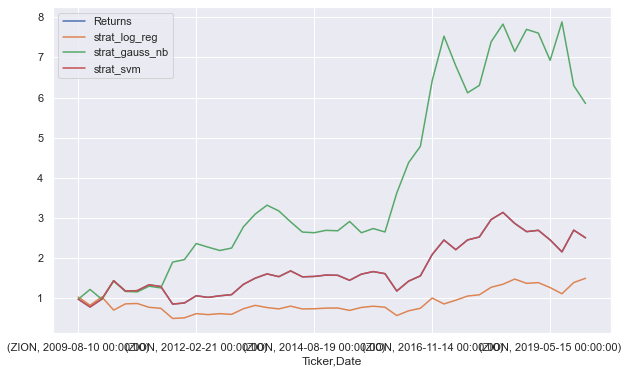

In [91]:
ZION_data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [106]:
"""
This chapter works with lagged return data as features data.
mostly in a binarized or digitized form.
Such features can be derived from the time series itself.
There are also Python packs for automated time series feature extraction tsfresh.

# Sequential Train-Test Split 
To judge the performance of the algo the following code implements a
sequential train test split. The idea is to simulate limited data during training 
and unseen data for test a simulation of live data. The real measure of the algo.
"""
A_data
XLNX_data['Returns'] = np.log(XLNX_data['Close'] / XLNX_data['Close'].shift(1))
XLNX_data.dropna(inplace=True)

In [107]:


XLNX_data['direction'] = np.sign(XLNX_data['Returns']).astype(int)

In [108]:
create_lags(XLNX_data)

In [109]:
create_bins(XLNX_data)

In [110]:
split = int(len(XLNX_data) * 0.5)

In [111]:
train = XLNX_data.iloc[:split].copy()

In [112]:
fit_models(train)

In [113]:
test = XLNX_data.iloc[split:].copy()

In [114]:
derive_positions(test)

In [115]:
evaluate_strats(test)

In [116]:
test[sel].sum().apply(np.exp)

Returns           1.954319
strat_log_reg     1.954319
strat_gauss_nb    3.196598
strat_svm         2.293010
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

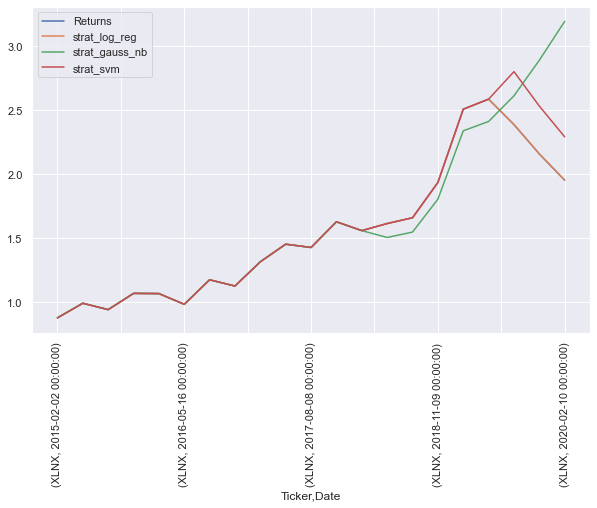

In [121]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10,6), rot=90)

In [169]:
"""
# Randomized Train-Test-Split
To test the performance of the algo out-of-sample.
"""

'\n# Randomized Train-Test-Split\nTo test the performance of the algo out-of-sample.\n'

In [186]:
ABM_data['Returns'] = np.log(ABM_data['Close'] / ABM_data['Close'].shift(1))

ABM_data.dropna(inplace=True)

ABM_data['direction'] = np.sign(ABM_data['Returns']).astype(int)

In [187]:
create_lags(ABM_data)

create_bins(ABM_data)

In [188]:
from sklearn.model_selection import train_test_split


train_, test_ = train_test_split(ABM_data,
                               test_size=.5,
                               shuffle=True,
                               random_state=14)

In [189]:
trainS = train_.copy().sort_index()

In [190]:
fit_models(trainS)

In [191]:
derive_positions(test_)

In [192]:
evaluate_strats(test_)

In [193]:
test[sel].sum().apply(np.exp)

Returns           1.183616
strat_log_reg     0.550140
strat_gauss_nb    0.802841
strat_svm         0.598065
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

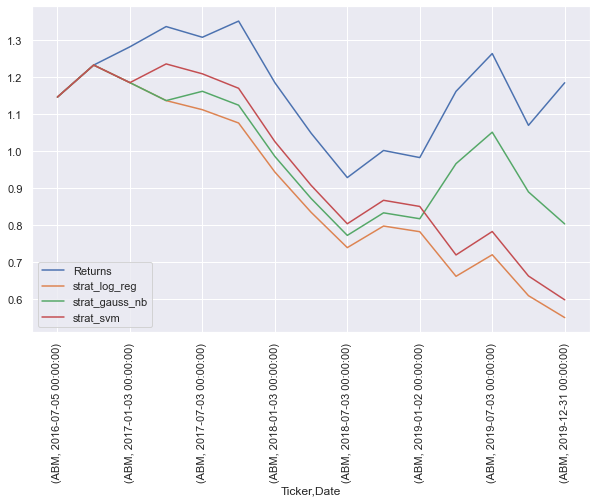

In [194]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10,6), rot=90)

In [218]:
"""
# Deep Neural Networks
Are in genereal composed of an input layer (the features), an output layer (the labels), and a number of hidden layers.
Hidden layer allow for more complex relationships to be learnd and to perform better on a number of problem types.

Here we apply MLPClassifier algo from sklearn, it is trained and tested on the whole dataset using digitized features.
This model appears to be overfitting the data.
"""

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=3 * [500],
                     random_state=14)

In [219]:
%time model.fit(XLNX_data[cols_bin], XLNX_data['direction'])

Wall time: 5.48 s


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[500, 500, 500], random_state=14,
              solver='lbfgs')

In [220]:
MLPClassifier(activation='relu',
              alpha=1e-05,
              batch_size='auto',
             beta_1=0.9)

MLPClassifier(alpha=1e-05)

In [221]:
XLNX_data['pos_dnn_sk'] = model.predict(XLNX_data[cols_bin])

In [222]:
XLNX_data['strat_dm_sk'] = XLNX_data['pos_dnn_sk'] * XLNX_data['Returns']

In [223]:
XLNX_data[['Returns', 'strat_dm_sk']].sum().apply(np.exp)

Returns        3.905106
strat_dm_sk    8.850488
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

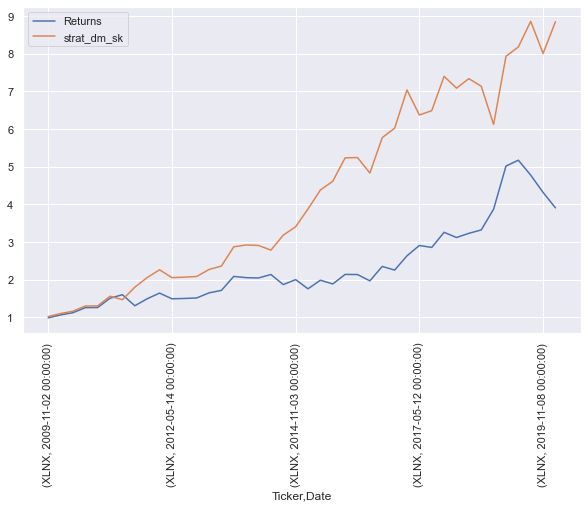

In [270]:
XLNX_data[['Returns', 'strat_dm_sk']].cumsum().apply(np.exp).plot(figsize=(10,6), rot=90)

In [256]:
"""
DNNs with TensorFlow

A TF application to derive an algo trading strategy is straight foward 
"""

'\nDNNs with TensorFlow\n\nA TF application to derive an algo trading strategy is straight foward \n'

In [257]:
A_data['Returns'] = np.log(A_data['Close'] / A_data['Close'].shift(1))
A_data.dropna(inplace=True)

In [258]:
A_data['direction'] = np.sign(A_data['Returns']).astype(int)

create_lags(A_data)

create_bins(A_data)

In [259]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [260]:
fc = [tf.contrib.layers.real_valued_column('lags', dimension=lags)]

In [261]:
modelA = tf.contrib.learn.DNNClassifier(hidden_units=3 * [500],
                                      n_classes=len(bins),
                                      feature_columns=fc)

In [262]:
def input_fn():
    fc = {'lags': tf.constant(A_data[cols_bin].values)}
    la = tf.constant(A_data['direction'].apply(
                    lambda x: 0 if x < 0 else 1).values,
                    shape=[A_data['direction'].size, 1])
    return fc, la

In [263]:
%time modelA.fit(input_fn=input_fn, steps=250)

Wall time: 1.1 s


DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x00000259193AEB88>, 'hidden_units': [500, 500, 500], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=5, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x0000025914F78048>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [264]:
modelA.evaluate(input_fn=input_fn, steps=1)

{'loss': 0.20983122, 'accuracy': 0.8888889, 'global_step': 250}

In [265]:
pred = np.array(list(modelA.predict(input_fn=input_fn)))

In [266]:
A_data['pos_dnn_tf'] = np.where(pred > 0, 1, -1)

In [267]:
A_data['strat_dm_tf'] = A_data['pos_dnn_tf'] * A_data['Returns']

In [268]:
A_data[['Returns', 'strat_dm_tf']].sum().apply(np.exp)

Returns        1.985500
strat_dm_tf    8.206195
dtype: float64

<AxesSubplot:xlabel='Ticker,Date'>

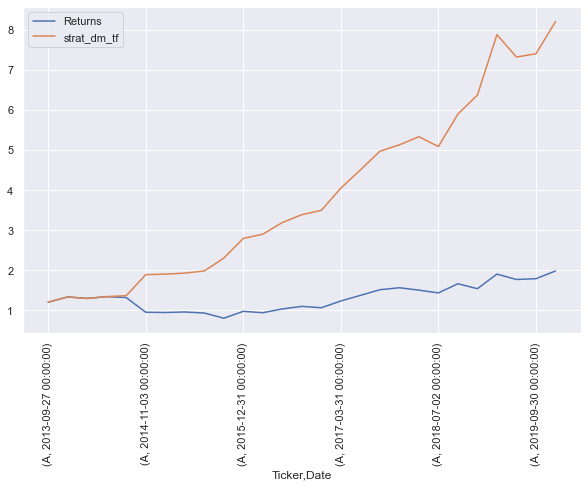

In [271]:
A_data[['Returns', 'strat_dm_tf']].cumsum().apply(np.exp).plot(figsize=(10,6), rot=90)